Igor de Jesus Santos - 119017594

Saulo Roberto - 120128489

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [30]:
def get_grid(start, end, jump):
    values = []
    h = start
    while h <= end:
        values.append(h)
        h += jump
        h = round(h,2)
    return values

In [31]:
def plotar1_1(aproximacao, y):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 15
    xh0_grid = get_grid(x_min, x_max, h[0])
    xh1_grid = get_grid(x_min, x_max, h[1])
    xh2_grid = get_grid(x_min, x_max, h[2])
    xh3_grid = get_grid(x_min, x_max, h[3])
    # Calculando o valor da função nesta malha (grid) gerada
    eh0_grid = aproximacao(x_min, x_max, y, h[0])
    eh1_grid = aproximacao(x_min, x_max, y, h[1])
    eh2_grid = aproximacao(x_min, x_max, y, h[2])
    eh3_grid = aproximacao(x_min, x_max, y, h[3])
    f_grid = []

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (10,10))
    ax.plot(xh0_grid, eh0_grid, linewidth = 1) # reta
    ax.plot(xh1_grid, eh1_grid, linewidth = 1) # reta
    ax.plot(xh2_grid, eh2_grid, linewidth = 1) # reta
    ax.plot(xh3_grid, eh3_grid, linewidth = 1) # reta

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(-1, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$h=0.10$", "$h=0.50$", "$h=0.75$", "$h=1.00$"], loc = "lower right", fontsize = 15)
    ax.grid(True)

    plt.show()

In [32]:
k = -1.335
ta = 25

In [33]:
def df(x, y=None):
    return k *(y - ta)



In [34]:
def f(t):
  return ta + (6 - ta) * math.exp(k * t)

In [35]:
def met_euler(a, b, y, h):
    valores = []
    x = a
    valores.append(y)
    while x < b:
        y_ = y + h * df(x, y)
        valores.append(y_)
        x += h
        y = y_
        x = round(x, 2)
    return valores

In [36]:
def met_euler_melhorado(a, b, y, h):
    valores = []
    x = a
    valores.append(y)
    while x < b:
        yh = y + df(x, y) * h
        y_ = y + (h / 2) * (df(x, y) + df(x + h, yh))
        valores.append(y_)
        y = y_
        x += h
        x = round(x, 2)
    return valores

In [37]:
def met_rk4(a, b, y, h):
    valores = []
    x = a
    valores.append(y)
    while x < b:
        k1 = h * df(x, y)
        k2 = h * df(x + h / 2, y + k1 / 2)
        k3 = h * df(x + h / 2, y + k2 / 2)
        k4 = h * df(x + h, y + k3)
        y_ = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        valores.append(y_)
        y = y_
        x += h
        x = round(x, 2)
    return valores

#1)

## a)

In [38]:
h = [0.1,0.5,0.75,1]

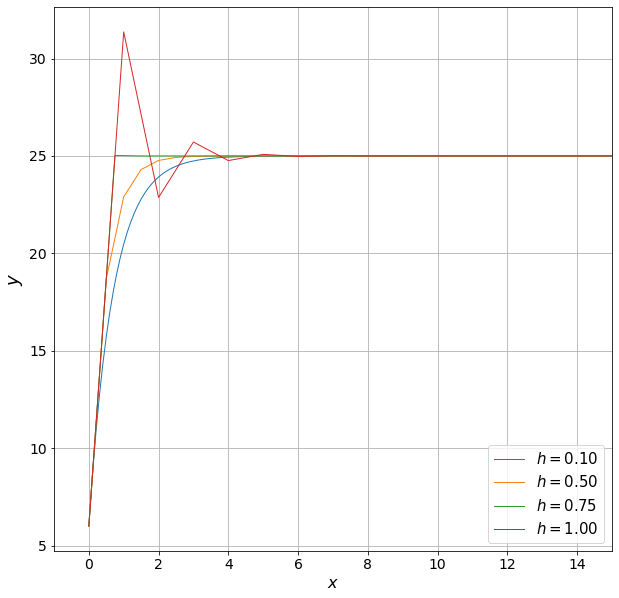

In [39]:
plotar1_1(met_euler, 6)

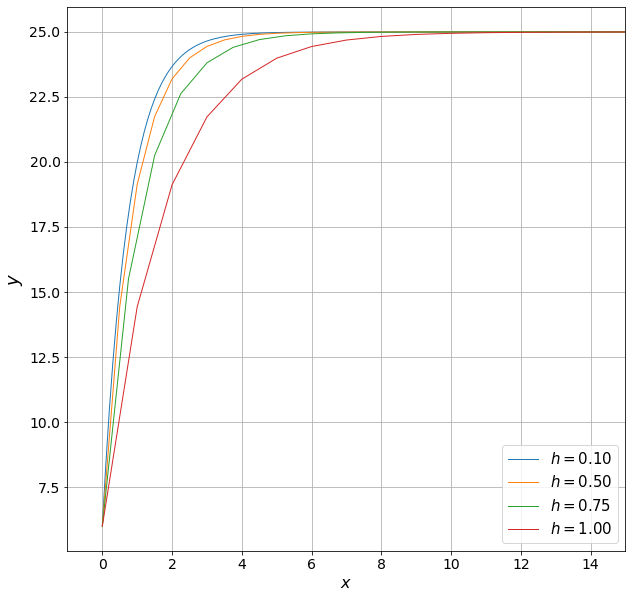

In [40]:
plotar1_1(met_euler_melhorado, 6)

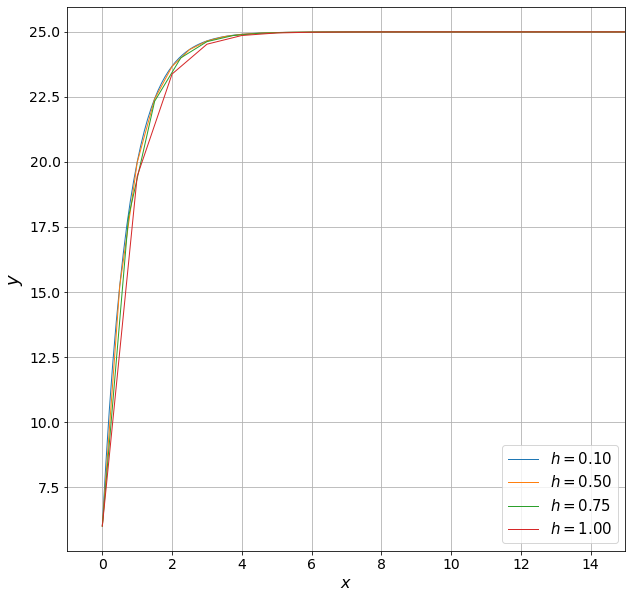

In [41]:
plotar1_1(met_rk4, 6)

## b) Aproximadamente 4 minutos 

##c)

In [42]:
def plotar1_3(y):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 15
    x_grid = get_grid(x_min, x_max, 0.5)
    xf_grid = get_grid(x_min, x_max, 0.1)

    
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    eh0_grid = met_euler(x_min, x_max, y, 0.5)
    eh1_grid = met_euler_melhorado(x_min, x_max, y, 0.5)
    eh2_grid = met_rk4(x_min, x_max, y, 0.5)

    f_grid = []

    for i in xf_grid:
      f_grid.append(f(i))
    

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (12,12))
    ax.plot(x_grid, eh0_grid, linewidth = 2) # reta
    ax.plot(x_grid, eh1_grid, linewidth = 2) # reta
    ax.plot(x_grid, eh2_grid, linewidth = 2) # reta
    ax.plot(xf_grid, f_grid, linewidth = 2) # reta

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(-2, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$Euler$", "$Euler$ $Melhorado$", "$RK4$", "$Função$ $Analítica$"], loc = "lower right", fontsize = 15)
    ax.grid(True)

    plt.show()

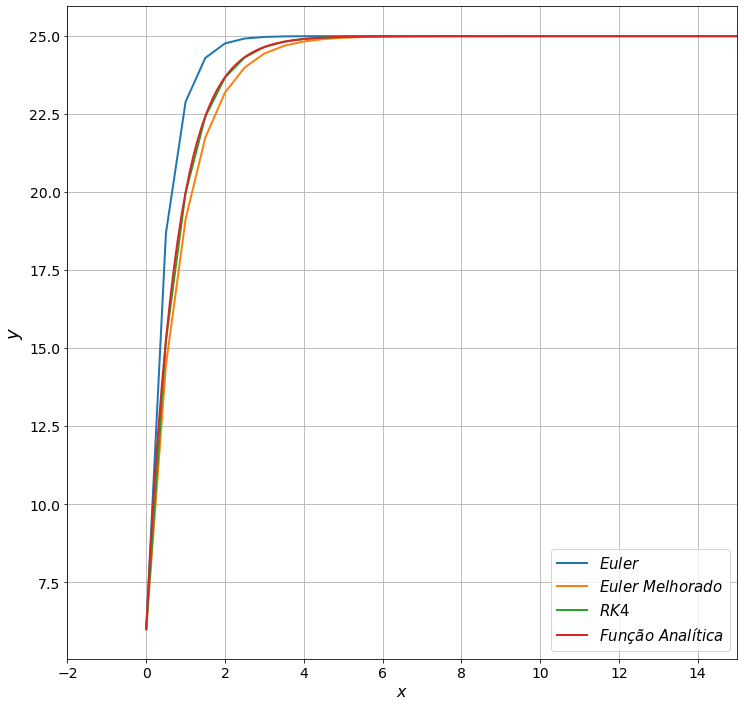

In [43]:
plotar1_3(6)

##d)

In [44]:
def plotar1_4(y):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 15
    x_grid = get_grid(x_min, x_max, 0.5)
    xf_grid = get_grid(x_min, x_max, 0.5)

    
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    eh0_grid = met_euler(x_min, x_max, y, 0.5)
    eh1_grid = met_euler_melhorado(x_min, x_max, y, 0.5)
    eh2_grid = met_rk4(x_min, x_max, y, 0.5)

    f_grid = []

    for i in xf_grid:
      f_grid.append(f(i))
    

    erro1 = []
    erro2 = []
    erro3 = []
    for i in range(len(f_grid)):
        erro = round((abs((f_grid[i] - eh0_grid[i]) / f_grid[i])) * 100, 2)
        erro1.append(erro)
        erro = round((abs((f_grid[i] - eh1_grid[i]) / f_grid[i])) * 100, 2)
        erro2.append(erro)
        erro = round((abs((f_grid[i] - eh2_grid[i]) / f_grid[i])) * 100, 2)
        erro3.append(erro)
    

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (10,10))
    ax.plot(x_grid, erro1, linewidth = 1) # reta
    ax.plot(x_grid, erro2, linewidth = 1) # reta
    ax.plot(x_grid, erro3, linewidth = 1) # reta

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(-1, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$Euler$", "$Euler$ $Melhorado$", "$RK4$"], loc = "upper right", fontsize = 15)
    ax.grid(True)
    plt.title("Erros")

    plt.show()

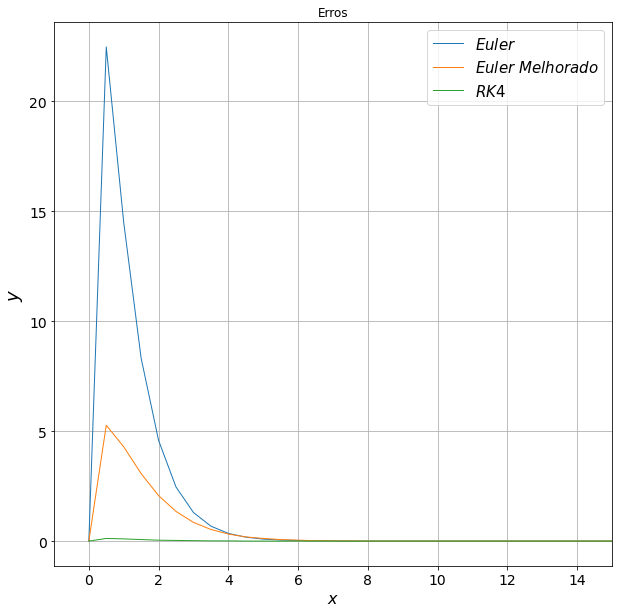

In [45]:
plotar1_4(6)

#3)

In [46]:
def fpresa(x, y):
  return 1.0 * x - 0.5 * x * y

In [47]:
def fpredador(x, y):
  return -0.75 * y + 0.5 * x * y

In [20]:
fpredador(100, 10)

492.5

In [48]:
def euler_vetor(f1, f2, a, b, y, h):
    valores = []
    t = a
    y_ = [0,0]
    valores.append(y)
    
    while t < b:
      y_[0] = y[0] + h * f1(y[0], y[1])

      y_[1] = y[1] + h * f2(y[0], y[1])
      valores.append([y_[0], y_[1]])

      t += h
      t = round(t,2)
      y = y_
      

    return valores

In [49]:
def plotar3(yInicial, h):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 10
    x_grid = get_grid(x_min, x_max, h)

    
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    pontosEixoY = euler_vetor(fpresa,fpredador ,x_min, x_max, yInicial, h)
    epresa_grid = []
    epredador_grid = []

    for pontos in pontosEixoY:
      epresa_grid.append(pontos[0])
      epredador_grid.append(pontos[1])
    

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (10,10))

    ax.plot(x_grid, epresa_grid, linewidth = 2) # presa
    ax.plot(x_grid, epredador_grid, linewidth = 2) # predador



    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(-1, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$Presa$", "$Predador$"], loc = "lower right", fontsize = 15)
    ax.grid(True)

    plt.show()

In [50]:
def plotarteste(yInicial, h):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 20
    x_grid = get_grid(x_min, x_max, h)

    
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    pontosEixoY = euler_vetor(fpresa,fpredador ,x_min, x_max, yInicial, h)
    epresa_grid = []
    epredador_grid = []

    for pontos in pontosEixoY:
      epresa_grid.append(pontos[0])
      epredador_grid.append(pontos[1])
    

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (10,10))

    ax.plot(x_grid, epresa_grid, linewidth = 2) # presa
    ax.plot(x_grid, epredador_grid, linewidth = 2) # predador



    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(-1, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$Presa$", "$Predador$"], loc = "lower right", fontsize = 15)
    ax.grid(True)

    plt.show()

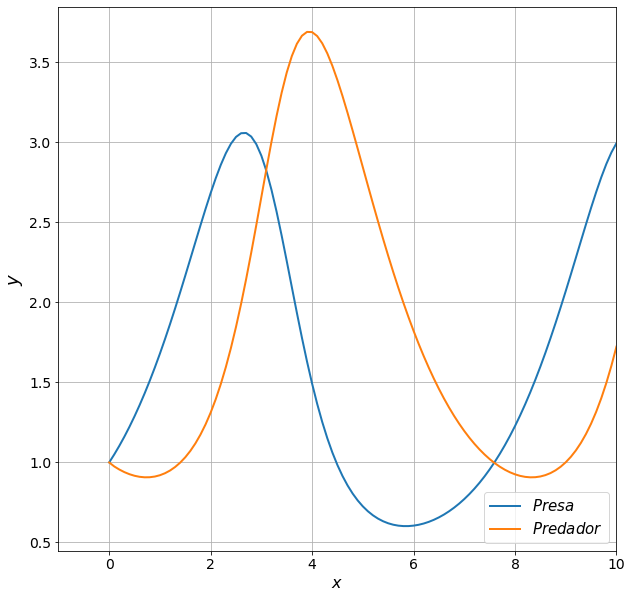

In [51]:
plotar3([1, 1],0.1)

In [52]:
def plotar3_1(yInicial, h):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 10
    x_grid = get_grid(x_min, x_max, h)

    
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    pontosPres_Pred = euler_vetor(fpresa,fpredador ,x_min, x_max, yInicial, h)
    
    func = []

    for i in range(len(pontosPres_Pred)):
      func.append(pontosPres_Pred[i][0] + pontosPres_Pred[i][1])

    

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (10,10))

    ax.plot(x_grid, func, linewidth = 2) 



    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(-1, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["Tempo X Soma das Populações"], loc = "upper right", fontsize = 15)
    ax.grid(True)

    plt.show()

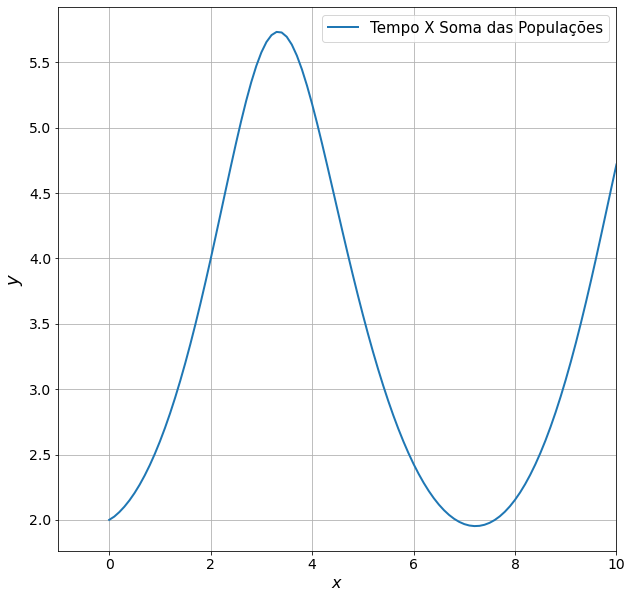

In [53]:
plotar3_1([1,1],0.1)

In [54]:
def plotar3_2(yInicial, h):
    # Realizando plot

    # Gerando a malha (grid)
    x_min, x_max = 0, 4
    t = get_grid(0, 10, h)

    
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    pontosPres_Pred = euler_vetor(fpresa,fpredador ,0, 8, yInicial, h)
    
    presa = []
    predador = []

    for i in range(len(pontosPres_Pred)):
      presa.append(pontosPres_Pred[i][0])
      predador.append(pontosPres_Pred[i][1])


    

    # Instruções do plot
    fig, ax = plt.subplots(figsize = (10,10))

    ax.plot(presa, predador, '*') 



    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(x_min, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["Presas X Predadores"], loc = "lower right", fontsize = 15)
    ax.grid(True)

    plt.show()

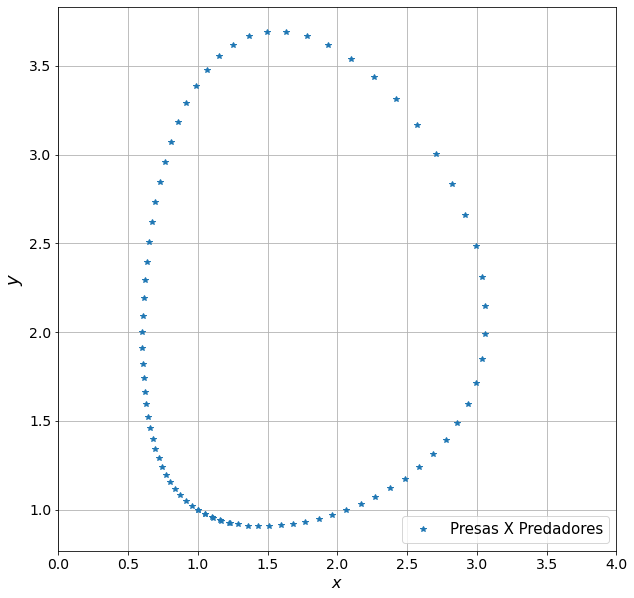

In [55]:
plotar3_2([1,1], 0.1)